<a href="https://colab.research.google.com/github/FLjv77/Quantum_ML_Course/blob/main/codes/introduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Installations

In [ ]:
pip install pennylane --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.1/56.1 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 24.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 930.8/930.8 kB 17.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 31.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 27.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.9/167.9 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 30.7 MB/s eta 0:00:00


###Imports

In [ ]:
import pennylane as qml
import numpy as np
import matplotlib as plt

###Qnode

In [ ]:
dev = qml.device("default.qubit", wires=3)


def my_circuit(theta, phi, omega):
    qml.RX(theta, wires=0)
    qml.RY(phi, wires=1)
    qml.RZ(omega, wires=2)
    qml.CNOT(wires=[0, 1])
    qml.CNOT(wires=[1, 2])
    qml.CNOT(wires=[2, 0])

    return qml.probs(wires=[0, 1, 2])


my_qnode = qml.QNode(my_circuit, dev)
theta, phi, omega = 0.1, 0.2, 0.3
my_qnode(theta, phi, omega)


array([9.87560268e-01, 0.00000000e+00, 0.00000000e+00, 2.47302134e-03,
       2.48960206e-05, 0.00000000e+00, 0.00000000e+00, 9.94181506e-03])

In [ ]:
dev = qml.device("default.qubit", wires=3)

@qml.qnode(dev)
def my_circuit(theta, phi, omega):
    qml.RX(theta, wires=0)
    qml.RY(phi, wires=1)
    qml.RZ(omega, wires=2)
    qml.CNOT(wires=[0, 1])
    qml.CNOT(wires=[1, 2])
    qml.CNOT(wires=[2, 0])

    return qml.probs(wires=[0, 1, 2])


theta, phi, omega = 0.1, 0.2, 0.3
my_qnode(theta, phi, omega)

array([9.87560268e-01, 0.00000000e+00, 0.00000000e+00, 2.47302134e-03,
       2.48960206e-05, 0.00000000e+00, 0.00000000e+00, 9.94181506e-03])

###Unitaries

In [ ]:
dev = qml.device("default.qubit", wires=1)

U = np.array([[1, 1], [1, -1]]) / np.sqrt(2)


@qml.qnode(dev)
def apply_u():
    qml.QubitUnitary(U, wires=0)
    return qml.state()


###Measurment

####Sampels

In [ ]:
dev = qml.device("default.qubit", wires = 1, shots = 10)

@qml.qnode(dev)
def circuit():
    qml.Hadamard(wires = 0)
    return qml.sample()
print(circuit())

[0 0 1 0 1 0 0 1 1 1]


####Counts

In [ ]:
dev = qml.device("default.qubit", wires = 1, shots = 1000)

@qml.qnode(dev)
def circuit_counts():
    qml.Hadamard(wires = 0)
    return qml.counts()
print(circuit_counts())

{np.str_('0'): np.int64(488), np.str_('1'): np.int64(512)}


####Probability

In [ ]:
dev = qml.device("default.qubit", wires = 2)

@qml.qnode(dev)
def prob_circuit_paulix():
    qml.X(1)
    return qml.probs()

print(prob_circuit_paulix())

[0. 1. 0. 0.]


In [ ]:
@qml.qnode(dev)
def prob_circuit_paulix():
    qml.H(0)
    qml.H(1)
    return qml.probs()

print(prob_circuit_paulix())

[0.25 0.25 0.25 0.25]


####Expectation value

In [18]:
dev = qml.device("default.qubit", wires = 2)

@qml.qnode(dev)
def expval_circuit_Z():
    qml.RY(np.pi/4, wires = 0)
    qml.RX(np.pi/3, wires = 1)
    qml.CNOT(wires = [0, 1])

    return qml.expval(qml.PauliZ(0))


expval_circuit_Z()

np.float64(0.7071067811865475)

In [21]:
dev = qml.device("default.qubit", wires = 2)

@qml.qnode(dev)
def expval_circuit_Z(obs):
    qml.RY(np.pi/4, wires = 0)
    qml.RX(np.pi/3, wires = 1)
    qml.CNOT(wires = [0, 1])
    return qml.expval(obs)


obs1 = qml.PauliZ(0) @ qml.PauliZ(1)
obs2 = qml.PauliX(0) @ qml.PauliX(1)

print(expval_circuit_Z(obs1))
print(expval_circuit_Z(obs2))

0.5000000000000001
0.7071067811865474


###Draw

0: ───────────╭●─┤  <Z>
1: ──RY(0.63)─╰X─┤     
(<Figure size 500x300 with 1 Axes>, <Axes: >)


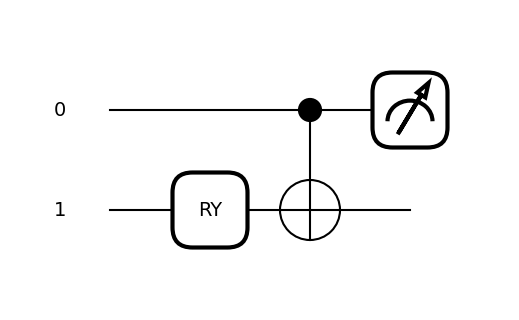

In [ ]:
dev = qml.device("default.qubit", wires = 2)

@qml.qnode(dev)
def circuit(theta):
    qml.RY(theta, wires=1)
    qml.CNOT(wires=[0, 1])
    return qml.expval(qml.PauliZ(0))

print(qml.draw(circuit)(np.pi / 5))
print(qml.draw_mpl(circuit)(np.pi / 5))